In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, RepeatedKFold

# get the data
data = pd.read_csv(
    "https://raw.githubusercontent.com/octosport/octopy/master/data/egm.csv",
    index_col=None,
    header=0,
)

(25024, 3)

In [7]:
# prepare data

y = data[["goals"]].values.ravel()
goal_average = data[["hat_y_xG"]].values
xG_average = data[["hat_y_g"]].values


In [26]:
# prepare model and CV

regressor = PoissonRegressor(alpha=0.0)
cv_method = RepeatedKFold(n_splits=10, random_state=1256)
scoring = "neg_mean_squared_error"


In [31]:
# evaluate model

goal_model_mse = cross_val_score(
    regressor, goal_average, y, scoring=scoring, cv=cv_method
)
xG_model_mse = cross_val_score(regressor, xG_average, y, scoring=scoring, cv=cv_method)


<AxesSubplot:xlabel='model', ylabel='cross-validated mse'>

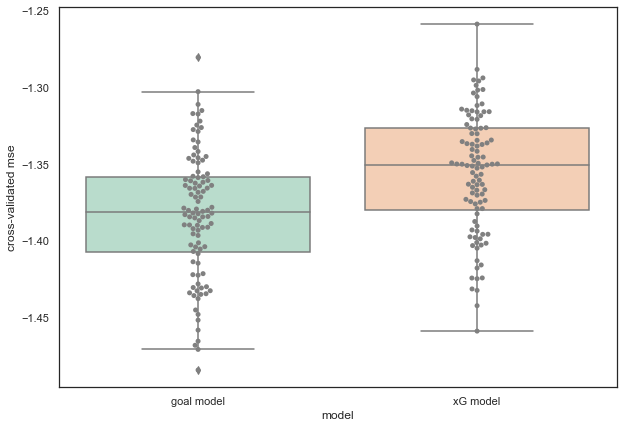

In [35]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(10, 7))

dataset = pd.concat(
    [
        pd.DataFrame({"cross-validated mse": -goal_model_mse, "model": "goal model"}),
        pd.DataFrame({"cross-validated mse": -xG_model_mse, "model": "xG model"}),
    ]
)

# Plot the orbital period with horizontal boxes


ax = sns.boxplot(
    y="cross-validated mse",
    x="model",
    data=dataset,
    orient="vertical",
    palette="Pastel2",
)
sns.swarmplot(y="cross-validated mse", x="model", data=dataset, color="grey")


In [25]:
dataset.groupby('model').describe()

cross-validated mse                                          \
                         count      mean       std       min       25%   
model                                                                    
goal model               100.0  1.383190  0.041151  1.276633  1.358773   
xG model                 100.0  1.351926  0.039081  1.249994  1.323355   

                                          
                 50%       75%       max  
model                                     
goal model  1.382296  1.408708  1.479933  
xG model    1.348512  1.374170  1.446073